In [1]:
pwd

'C:\\Users\\arpan'

In [28]:
import numpy
# PRAW to interact with reddit
import praw
#install textblob if not already installed using "pip install -U textblob"
import pandas as pd
import nltk
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import en_core_web_sm
import spacy
from textblob import TextBlob

# Download VADER, if not downloaded
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [29]:
reddit = praw.Reddit(client_id="oVvWaUI3l8446YsskkzxxQ", 
                     client_secret="7FdpmSXMNgkxDKImkI3yG3xhdmelQw",
                     user_agent="asw751" )
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
subreddit = reddit.subreddit("anime")
for submission in subreddit.hot(limit=7):
    print (submission.title)
    print(submission.id,"\n")

Casual Discussion Fridays - Week of May 20, 2022
utgljw 

Blue Period - Thursday Anime Discussion Thread (ft. the /r/anime Writing Club)
uxuoil 

The Masterful Cat Is Depressed Again Today anime announced (coming 2023)
uxjgqu 

Armstrong family internal affairs [Full Metal Alchemist: Brotherhood]
uxk0zi 

Spoon feeding a fork [Machikado Mazoku: 2-choume]
uxts32 

TOP 10 GIRL of the Week #6 for the Spring 2022 anime season
uy064m 

She has such a way with words [K-ON!!]
uxce4g 



In [31]:
post1 = reddit.submission(id="uxh008")

In [32]:
comments_all = []
post1.comments.replace_more(limit=None)
for comments in post1.comments.list():
    comments_all.append(comments.body)
print(comments_all, "\n")
print(len(comments_all))

['# Source Material Corner\n\nReply to this comment for any source-related discussion, future spoilers (including future characters, events and general hype about future content), comparison of the anime adaptation to the original, or just general talk about the source material. **You are still required to tag all spoilers.** Discussions about the source outside of this comment tree will be removed, and replying with spoilers outside of the source corner will lead to bans.\n\nThe spoiler syntax is:  \n`[Spoiler source] >!Spoiler goes here!<`\n\n# **All untagged spoilers and hints in this thread will receive immediate 8-day bans (minimum).**\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/anime) if you have any questions or concerns.*', 'Considering all that talk about how they are not at a high enough level to fight humans, they sure did plow through them like dominoes lol.', '[removed]', 'Merchant

In [33]:
list1=comments_all
list1=[str(i) for i in list1]
string_uncleaned = " , ".join(list1)
string_uncleaned

'# Source Material Corner\n\nReply to this comment for any source-related discussion, future spoilers (including future characters, events and general hype about future content), comparison of the anime adaptation to the original, or just general talk about the source material. **You are still required to tag all spoilers.** Discussions about the source outside of this comment tree will be removed, and replying with spoilers outside of the source corner will lead to bans.\n\nThe spoiler syntax is:  \n`[Spoiler source] >!Spoiler goes here!<`\n\n# **All untagged spoilers and hints in this thread will receive immediate 8-day bans (minimum).**\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/anime) if you have any questions or concerns.* , Considering all that talk about how they are not at a high enough level to fight humans, they sure did plow through them like dominoes lol. , [removed] , Merchant Nao

In [34]:
string_emojiless = emoji.get_emoji_regexp().sub(u'', string_uncleaned)

<ipython-input-34-21d2b4aef19e>:1: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  string_emojiless = emoji.get_emoji_regexp().sub(u'', string_uncleaned)


In [35]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)

['Source', 'Material', 'Corner', 'Reply', 'to', 'this', 'comment', 'for', 'any', 'source', 'related', 'discussion', 'future', 'spoilers', 'including', 'future', 'characters', 'events', 'and', 'general', 'hype', 'about', 'future', 'content', 'comparison', 'of', 'the', 'anime', 'adaptation', 'to', 'the', 'original', 'or', 'just', 'general', 'talk', 'about', 'the', 'source', 'material', 'You', 'are', 'still', 'required', 'to', 'tag', 'all', 'spoilers', 'Discussions', 'about', 'the', 'source', 'outside', 'of', 'this', 'comment', 'tree', 'will', 'be', 'removed', 'and', 'replying', 'with', 'spoilers', 'outside', 'of', 'the', 'source', 'corner', 'will', 'lead', 'to', 'bans', 'The', 'spoiler', 'syntax', 'is', 'Spoiler', 'source', 'Spoiler', 'goes', 'here', 'All', 'untagged', 'spoilers', 'and', 'hints', 'in', 'this', 'thread', 'will', 'receive', 'immediate', '8', 'day', 'bans', 'minimum', 'I', 'am', 'a', 'bot', 'and', 'this', 'action', 'was', 'performed', 'automatically', 'Please', 'contact', '

In [36]:
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['source', 'material', 'corner', 'reply', 'to', 'this', 'comment', 'for', 'any', 'source', 'related', 'discussion', 'future', 'spoilers', 'including', 'future', 'characters', 'events', 'and', 'general', 'hype', 'about', 'future', 'content', 'comparison', 'of', 'the', 'anime', 'adaptation', 'to', 'the', 'original', 'or', 'just', 'general', 'talk', 'about', 'the', 'source', 'material', 'you', 'are', 'still', 'required', 'to', 'tag', 'all', 'spoilers', 'discussions', 'about', 'the', 'source', 'outside', 'of', 'this', 'comment', 'tree', 'will', 'be', 'removed', 'and', 'replying', 'with', 'spoilers', 'outside', 'of', 'the', 'source', 'corner', 'will', 'lead', 'to', 'bans', 'the', 'spoiler', 'syntax', 'is', 'spoiler', 'source', 'spoiler', 'goes', 'here', 'all', 'untagged', 'spoilers', 'and', 'hints', 'in', 'this', 'thread', 'will', 'receive', 'immediate', '8', 'day', 'bans', 'minimum', 'i', 'am', 'a', 'bot', 'and', 'this', 'action', 'was', 'performed', 'automatically', 'please', 'contact', '

In [37]:
nlp = en_core_web_sm.load()
all_stopwords = nlp.Defaults.stop_words
text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]
print(tokens_without_sw)

['source', 'material', 'corner', 'reply', 'comment', 'source', 'related', 'discussion', 'future', 'spoilers', 'including', 'future', 'characters', 'events', 'general', 'hype', 'future', 'content', 'comparison', 'anime', 'adaptation', 'original', 'general', 'talk', 'source', 'material', 'required', 'tag', 'spoilers', 'discussions', 'source', 'outside', 'comment', 'tree', 'removed', 'replying', 'spoilers', 'outside', 'source', 'corner', 'lead', 'bans', 'spoiler', 'syntax', 'spoiler', 'source', 'spoiler', 'goes', 'untagged', 'spoilers', 'hints', 'thread', 'receive', 'immediate', '8', 'day', 'bans', 'minimum', 'bot', 'action', 'performed', 'automatically', 'contact', 'moderators', 'subreddit', 'message', 'compose', 'r', 'anime', 'questions', 'concerns', 'considering', 'talk', 'high', 'level', 'fight', 'humans', 'sure', 'plow', 'like', 'dominoes', 'lol', 'removed', 'merchant', 'naofumi', 'forgot', 'missed', 'rising', 'drip', 'hero', 'https', 'imgur', 'com', '0nyzuap', 'ok', 'episode', 'thin

In [38]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['source', 'material', 'corner', 'reply', 'comment', 'source', 'related', 'discussion', 'future', 'spoiler', 'including', 'future', 'character', 'event', 'general', 'hype', 'future', 'content', 'comparison', 'anime', 'adaptation', 'original', 'general', 'talk', 'source', 'material', 'required', 'tag', 'spoiler', 'discussion', 'source', 'outside', 'comment', 'tree', 'removed', 'replying', 'spoiler', 'outside', 'source', 'corner', 'lead', 'ban', 'spoiler', 'syntax', 'spoiler', 'source', 'spoiler', 'go', 'untagged', 'spoiler', 'hint', 'thread', 'receive', 'immediate', '8', 'day', 'ban', 'minimum', 'bot', 'action', 'performed', 'automatically', 'contact', 'moderator', 'subreddit', 'message', 'compose', 'r', 'anime', 'question', 'concern', 'considering', 'talk', 'high', 'level', 'fight', 'human', 'sure', 'plow', 'like', 'domino', 'lol', 'removed', 'merchant', 'naofumi', 'forgot', 'missed', 'rising', 'drip', 'hero', 'http', 'imgur', 'com', '0nyzuap', 'ok', 'episode', 'think', 's', 'pretty', 

In [39]:
stemmer = PorterStemmer()
stem_tokens = ([stemmer.stem(s) for s in tokens_without_sw])
print(stem_tokens)

['sourc', 'materi', 'corner', 'repli', 'comment', 'sourc', 'relat', 'discuss', 'futur', 'spoiler', 'includ', 'futur', 'charact', 'event', 'gener', 'hype', 'futur', 'content', 'comparison', 'anim', 'adapt', 'origin', 'gener', 'talk', 'sourc', 'materi', 'requir', 'tag', 'spoiler', 'discuss', 'sourc', 'outsid', 'comment', 'tree', 'remov', 'repli', 'spoiler', 'outsid', 'sourc', 'corner', 'lead', 'ban', 'spoiler', 'syntax', 'spoiler', 'sourc', 'spoiler', 'goe', 'untag', 'spoiler', 'hint', 'thread', 'receiv', 'immedi', '8', 'day', 'ban', 'minimum', 'bot', 'action', 'perform', 'automat', 'contact', 'moder', 'subreddit', 'messag', 'compos', 'r', 'anim', 'question', 'concern', 'consid', 'talk', 'high', 'level', 'fight', 'human', 'sure', 'plow', 'like', 'domino', 'lol', 'remov', 'merchant', 'naofumi', 'forgot', 'miss', 'rise', 'drip', 'hero', 'http', 'imgur', 'com', '0nyzuap', 'ok', 'episod', 'think', 's', 'pretti', 'good', 'like', 'adventur', 'new', 'locat', 'kizuna', 'explain', 'race', 'live',

In [40]:
cleaned_output = lemmatized_tokens

In [42]:
sia = SIA()
results=[]
for sentences in cleaned_output:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words']=sentences
    results.append(pol_score)
pd.set_option("display.max_columns", None, "max_colwidth", None)
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.00,source
1,0.0,1.0,0.0,0.00,material
2,0.0,1.0,0.0,0.00,corner
3,0.0,1.0,0.0,0.00,reply
4,0.0,1.0,0.0,0.00,comment
...,...,...,...,...,...
3518,0.0,1.0,0.0,0.00,destination
3519,0.0,1.0,0.0,0.00,sacred
3520,0.0,1.0,0.0,0.00,timeline
3521,0.0,0.0,1.0,0.34,restored


In [43]:
df["label"] = 0
df.loc[df["compound"]>0.1, "label"]=1
df.loc[df["compound"]<-0.1, "label"]=-1
df.head()

,neg,neu,pos,compound,words,label
0,0.0,1.0,0.0,0.0,source,0
1,0.0,1.0,0.0,0.0,material,0
2,0.0,1.0,0.0,0.0,corner,0
3,0.0,1.0,0.0,0.0,reply,0
4,0.0,1.0,0.0,0.0,comment,0


In [44]:
print(df.label.value_counts())

 0    2899
 1     427
-1     197
Name: label, dtype: int64


In [51]:
df_positive_negative = df.loc[df["label"] !=0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
21,0.0,0.0,1.0,0.3182,original,1
41,1.0,0.0,0.0,-0.5574,ban,-1
56,1.0,0.0,0.0,-0.5574,ban,-1
75,1.0,0.0,0.0,-0.3818,fight,-1
77,0.0,0.0,1.0,0.3182,sure,1


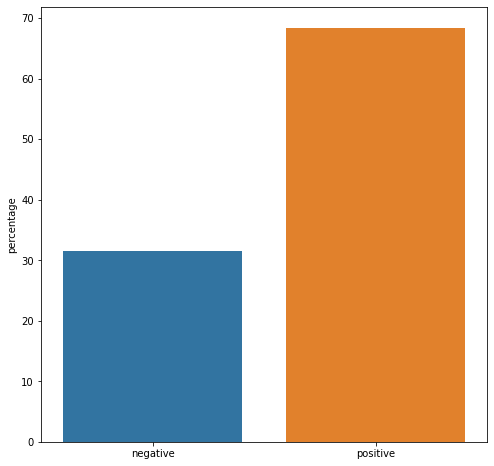

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
counts = df_positive_negative.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['negative','positive'])
ax.set_ylabel('percentage')
plt.show()